In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [20]:
df=pd.read_pickle('/Users/user/Documents/Instacart Basket Analysis/02 Data/Prepared Data/final_merge_2.pkl') 

In [21]:
#inspecting our dataframe and checking if we are working with IPP
print(df)

          product_id                product_name  aisle_id  department_id  \
0                  1  Chocolate Sandwich Cookies        61             19   
1                  1  Chocolate Sandwich Cookies        61             19   
2                907        Premium Sliced Bacon       106             12   
3                907        Premium Sliced Bacon       106             12   
4               1000                    Apricots        18             10   
...              ...                         ...       ...            ...   
32404854       49235         Organic Half & Half        53             16   
32404855       49520      Orange Sparkling Water       115              7   
32404856       49520      Orange Sparkling Water       115              7   
32404857       49520      Orange Sparkling Water       115              7   
32404858       49520      Orange Sparkling Water       115              7   

          prices  order_id  user_id  order_number  orders_days_of_week  \
0

In [22]:
#deleting name column 
df.drop(columns=['first_name'], inplace=True)

In [23]:
#deleting last name column
df.drop(columns=['last_name'], inplace=True)

In [24]:
#deleting other columns 
df.drop(columns=['_merge', 'merge_indicator', 'final_merge'], inplace=True)

In [25]:
pd.options.display.max_columns = None
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_order,loyalty_flag,mean_price,spender_flag,frequency_mean,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,32,14.790541,Regular cusomer,6.935811,Low spender,10.4,Regular customer,Male,Minnesota,81,2019-08-01,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,32,14.790541,Regular cusomer,6.935811,Low spender,10.4,Regular customer,Male,Minnesota,81,2019-08-01,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4,0,32,14.790541,Regular cusomer,6.935811,Low spender,10.4,Regular customer,Male,Minnesota,81,2019-08-01,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,32,14.790541,Regular cusomer,6.935811,Low spender,10.4,Regular customer,Male,Minnesota,81,2019-08-01,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,32,14.790541,Regular cusomer,6.935811,Low spender,10.4,Regular customer,Male,Minnesota,81,2019-08-01,1,married,49620


# #Task 3. Create a regional segmentation of the data.

In [9]:
# creating a “Region” column based on the “State” column 

# Define the mapping of states to regions
state_to_region = {
    # Region 1: Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',
    # Region 2: Midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest',
    'Indiana': 'Midwest', 'Ohio': 'Midwest', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',
    # Region 3: South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South',
    'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South',
    'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South',
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South',
    'Arkansas': 'South', 'Louisiana': 'South',
    # Region 4: West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West',
    'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 'New Mexico': 'West',
    'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West', 'California': 'West',
    'Hawaii': 'West'
}

# Create the 'Region' column by mapping the 'State' column
df['region'] = df['state'].map(state_to_region)

In [10]:
#checking if new column "state" was created 
print(df.head())

   product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   
1           1  Chocolate Sandwich Cookies        61             19     5.8   
2         907        Premium Sliced Bacon       106             12    20.0   
3         907        Premium Sliced Bacon       106             12    20.0   
4        1000                    Apricots        18             10    12.9   

   order_id  user_id  order_number  orders_days_of_week  order_hour_of_day  \
0   3139998      138            28                    6                 11   
1   1977647      138            30                    6                 17   
2   3160996      138             1                    5                 13   
3   2254091      138            10                    5                 14   
4    505689      138             9                    6                 12   

   days_since_prior_order  add_to_cart_order  reordered  max_o

# The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

# Regions vs. spending flags

In [11]:
# Create a cross-tabulation of regions vs. spending flags
spending_habits_by_region = pd.crosstab(index=df['region'], columns=df['spender_flag'])

# Print
print(spending_habits_by_region)

spender_flag  High spender  Low spender
region                                 
Midwest             155975      7441350
Northeast           108225      5614511
South               209691     10582194
West                160354      8132559


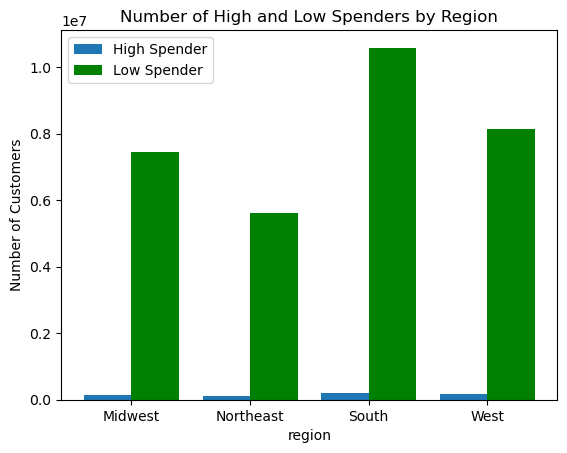

In [12]:
# creating stackbar 
regions = ['Midwest', 'Northeast', 'South', 'West']
high_spenders = [155975, 108225, 209691, 160354]
low_spenders = [7441350, 5614511, 10582194, 8132559]

bar_width = 0.4  # width of the bars

index = np.arange(len(regions))  # the label locations

# Create the plot
fig, ax = plt.subplots()
bars1 = ax.bar(index - bar_width/2, high_spenders, bar_width, label='High Spender')
bars2 = ax.bar(index + bar_width/2, low_spenders, bar_width, label='Low Spender', color='green')

# Add some text for labels, title, and custom x-axis tick labels.
ax.set_xlabel('region')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of High and Low Spenders by Region')
ax.set_xticks(index)
ax.set_xticklabels(regions)
ax.legend()

plt.savefig('/Users/user/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/high_vs_low_spenders_by_regions.png')

plt.show()

In [13]:
#Calculate row percentages to see the proportion of each spending habit within regions
spending_habits_by_region_percent = spending_habits_by_region.div(spending_habits_by_region.sum(axis=1), axis=0) * 100

print(spending_habits_by_region_percent)

spender_flag  High spender  Low spender
region                                 
Midwest           2.053025    97.946975
Northeast         1.891141    98.108859
South             1.943043    98.056957
West              1.933627    98.066373


# Task 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [14]:
# Create the exclusion flag for low-activity customers
df['exclusion_flag'] = df['order_number'].apply(lambda x: 'Exclude' if x < 5 else 'Include')

# Filter out the customers to exclude (those with the 'Exclude' flag)
df_filter = df[df['exclusion_flag'] == 'Include'].drop(columns=['exclusion_flag'])

In [15]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_order,loyalty_flag,mean_price,spender_flag,frequency_mean,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,32,14.790541,Regular cusomer,6.935811,Low spender,10.4,Regular customer,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Include
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,32,14.790541,Regular cusomer,6.935811,Low spender,10.4,Regular customer,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Include
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4,0,32,14.790541,Regular cusomer,6.935811,Low spender,10.4,Regular customer,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Exclude
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,32,14.790541,Regular cusomer,6.935811,Low spender,10.4,Regular customer,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Include
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,32,14.790541,Regular cusomer,6.935811,Low spender,10.4,Regular customer,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Include


In [16]:
# departments DataFrame
departments_data = {
    'department_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    'department': ['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international', 'beverages', 'pets',
                   'dry goods pasta', 'bulk', 'personal care', 'meat seafood', 'pantry', 'breakfast', 
                   'canned goods', 'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing']
}
departments_df = pd.DataFrame(departments_data)

# Create a mapping dictionary from the departments DataFrame
department_mapping = pd.Series(departments_df.department.values,index=departments_df.department_id).to_dict()

# Replace 'department_id' in df with department names using the mapping
df['department'] = df['department_id'].map(department_mapping)

print(df.head())


   product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   
1           1  Chocolate Sandwich Cookies        61             19     5.8   
2         907        Premium Sliced Bacon       106             12    20.0   
3         907        Premium Sliced Bacon       106             12    20.0   
4        1000                    Apricots        18             10    12.9   

   order_id  user_id  order_number  orders_days_of_week  order_hour_of_day  \
0   3139998      138            28                    6                 11   
1   1977647      138            30                    6                 17   
2   3160996      138             1                    5                 13   
3   2254091      138            10                    5                 14   
4    505689      138             9                    6                 12   

   days_since_prior_order  add_to_cart_order  reordered  max_o

# Popular products 

In [17]:
product_orders_by_region = df.groupby(['product_name', 'region'])['order_id'].nunique().reset_index(name='order_count')


# This sorts first by 'region' and then within each region by 'order_count' in descending order
popular_products_by_region = product_orders_by_region.sort_values(by=['region', 'order_count'], ascending=[True, False])

# If you want to display the top N popular products by region, you can do this with a loop or additional grouping
top_n = 5
top_products_by_region = popular_products_by_region.groupby('region').head(top_n)

print(top_products_by_region) 

                  product_name     region  order_count
13759                   Banana    Midwest       110327
12981   Bag of Organic Bananas    Midwest        89270
120290    Organic Strawberries    Midwest        61611
108403    Organic Baby Spinach    Midwest        56220
114027    Organic Hass Avocado    Midwest        49434
13760                   Banana  Northeast        83345
12982   Bag of Organic Bananas  Northeast        66885
120291    Organic Strawberries  Northeast        46903
108404    Organic Baby Spinach  Northeast        42174
114028    Organic Hass Avocado  Northeast        37795
13761                   Banana      South       158336
12983   Bag of Organic Bananas      South       125585
120292    Organic Strawberries      South        88379
108405    Organic Baby Spinach      South        81399
114029    Organic Hass Avocado      South        69833
13762                   Banana       West       120557
12984   Bag of Organic Bananas       West        97710
120293    

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without as

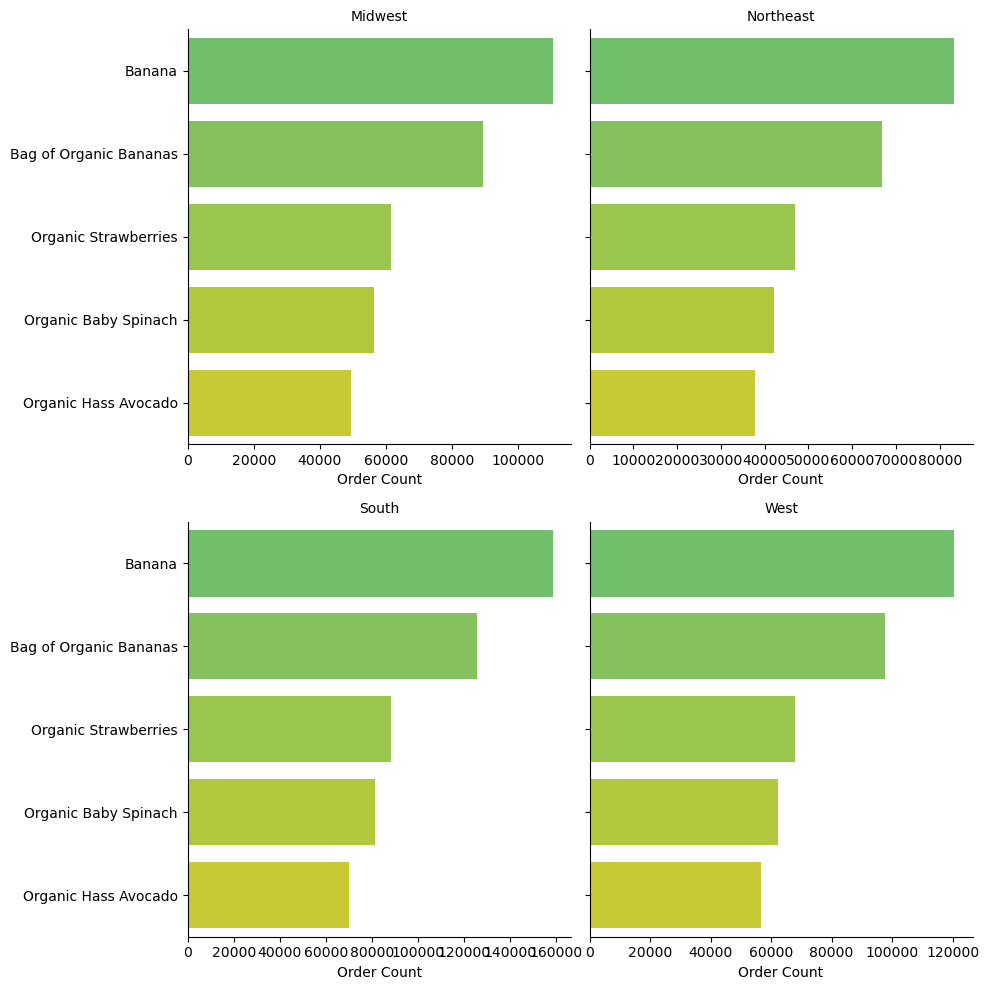

In [18]:
#creating charts 
top_products_by_region = top_products_by_region.sort_values(by=['region', 'order_count'], ascending=[True, False])

# Create a FacetGrid. This allows us to build separate plots for each region.
g = sns.FacetGrid(top_products_by_region, col="region", col_wrap=2, sharex=False, height=5, aspect=1)

# Map a bar plot to each subset.
g.map(sns.barplot, 'order_count', 'product_name', palette='viridis', order=top_products_by_region['product_name'])

g.set_titles('{col_name}')
g.set_axis_labels("Order Count", "Product Name")
g.set(xlabel="Order Count", ylabel="")

# Adjust the layout so things aren't so cramped
g.fig.tight_layout(w_pad=1)

# Show plot
plt.show()


# Seasonality by analyzing order counts across different times (days of the week, hours of the day).

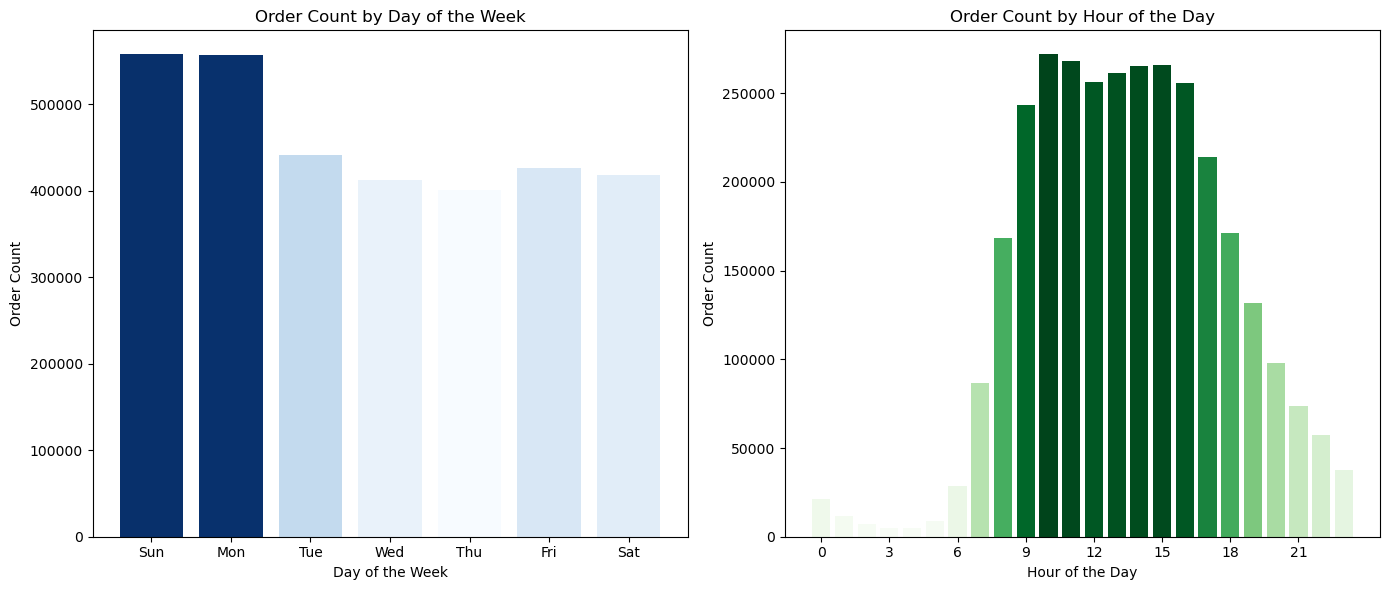

In [19]:
#plotting area for charts 
plt.figure(figsize=(14, 6))

# Count unique orders per day of the week 
seasonality_by_orders_days_of_week = df.groupby('orders_days_of_week').agg(
    order_count=('order_id', 'nunique')  
).reset_index()
seasonality_by_orders_days_of_week.rename(columns={'order_count': 'count'}, inplace=True)

# Count unique orders per hour of the day
seasonality_by_hours_of_day = df.groupby('order_hour_of_day').agg(
    order_count=('order_id', 'nunique')  # Count unique orders per hour of the day
).reset_index()
seasonality_by_hours_of_day.rename(columns={'order_count': 'count'}, inplace=True)

# Prepare the color shade for day of the week
norm_day = plt.Normalize(min(seasonality_by_orders_days_of_week['count']), max(seasonality_by_orders_days_of_week['count']))
colors_day = [plt.cm.Blues(norm_day(value)) for value in seasonality_by_orders_days_of_week['count']]

# Prepare the color shade for hour of the day
norm_hour = plt.Normalize(min(seasonality_by_hours_of_day['count']), max(seasonality_by_hours_of_day['count']))
colors_hour = [plt.cm.Greens(norm_hour(value)) for value in seasonality_by_hours_of_day['count']]

# Plotting Orders by Day of the Week with color shade
plt.subplot(1, 2, 1)
plt.bar(seasonality_by_orders_days_of_week['orders_days_of_week'], seasonality_by_orders_days_of_week['count'], color=colors_day)
plt.title('Order Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Order Count')
plt.xticks(range(0, 7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

# Plotting Orders by Hour of the Day with color shade
plt.subplot(1, 2, 2)
plt.bar(seasonality_by_hours_of_day['order_hour_of_day'], seasonality_by_hours_of_day['count'], color=colors_hour)
plt.title('Order Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Count')
plt.xticks(range(0, 24, 3))

plt.tight_layout()

# Saving
plt.savefig('/Users/user/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/orders_vs_days_hours.png')
plt.show()


# What time of the day people shop based on the region? 

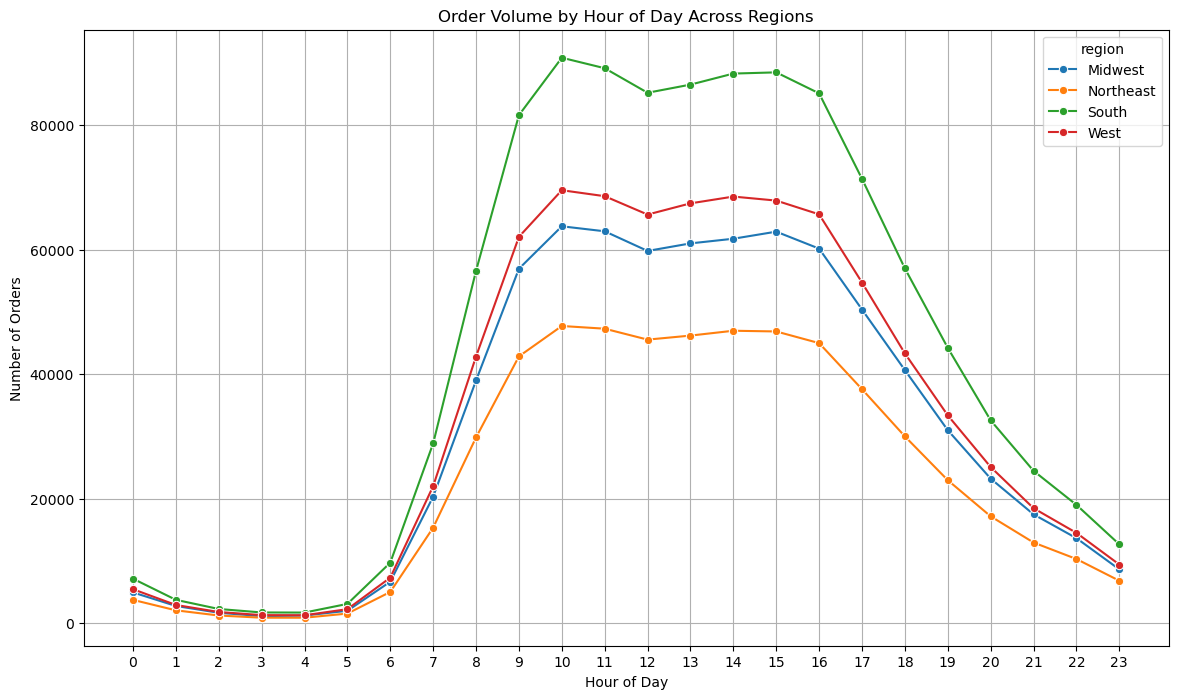

In [20]:
# Group by 'region' and 'order_hour_of_day' and count orders
order_counts_by_hour_region = df.groupby(['region', 'order_hour_of_day'])['order_id'].nunique().reset_index(name='order_count')

#creating chart
plt.figure(figsize=(14, 8))
sns.lineplot(data=order_counts_by_hour_region, x='order_hour_of_day', y='order_count', hue='region', marker='o')
plt.title('Order Volume by Hour of Day Across Regions')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))  # Assuming order_hour_of_day is in 24-hour format
plt.legend(title='region')
plt.grid(True)

#saving to PNG file 
plt.savefig('/Users/user/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/orders_hour_of_day_regions.png')
plt.show()

# What time of the day people shop based on their age? 

In [21]:
# Define bins and labels for the age groups
bins = [18, 25, 35, 45, 55, 65, float('inf')]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

#aggregate data by age group and order hour of the day
order_counts_by_hour_age = df.groupby(['age_group', 'order_hour_of_day'], observed=True)['order_id'].nunique().reset_index(name='order_count')

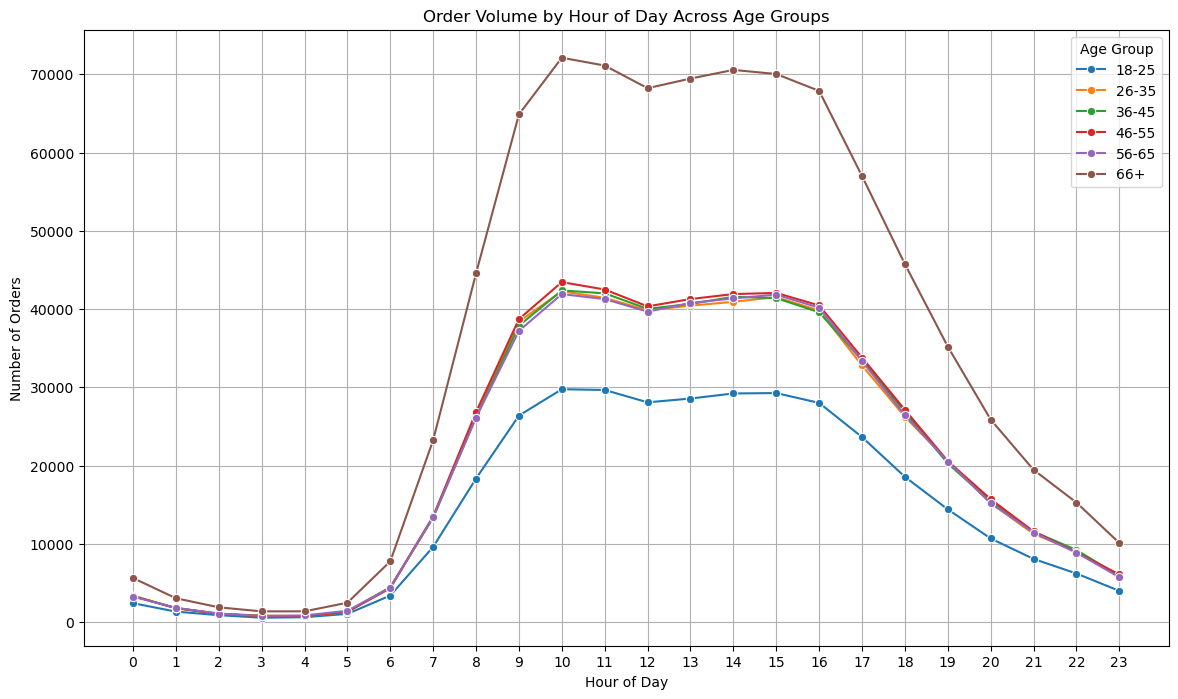

In [22]:
# creating chart 
plt.figure(figsize=(14, 8))
sns.lineplot(data=order_counts_by_hour_age, x='order_hour_of_day', y='order_count', hue='age_group', marker='o')
plt.title('Order Volume by Hour of Day Across Age Groups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))  
plt.legend(title='Age Group')
plt.grid(True)

#saving to PNG file 
plt.savefig('/Users/user/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/order_volume_hour_day_age_groups.png')
plt.show()


# What's customer preferences or shopping trends?

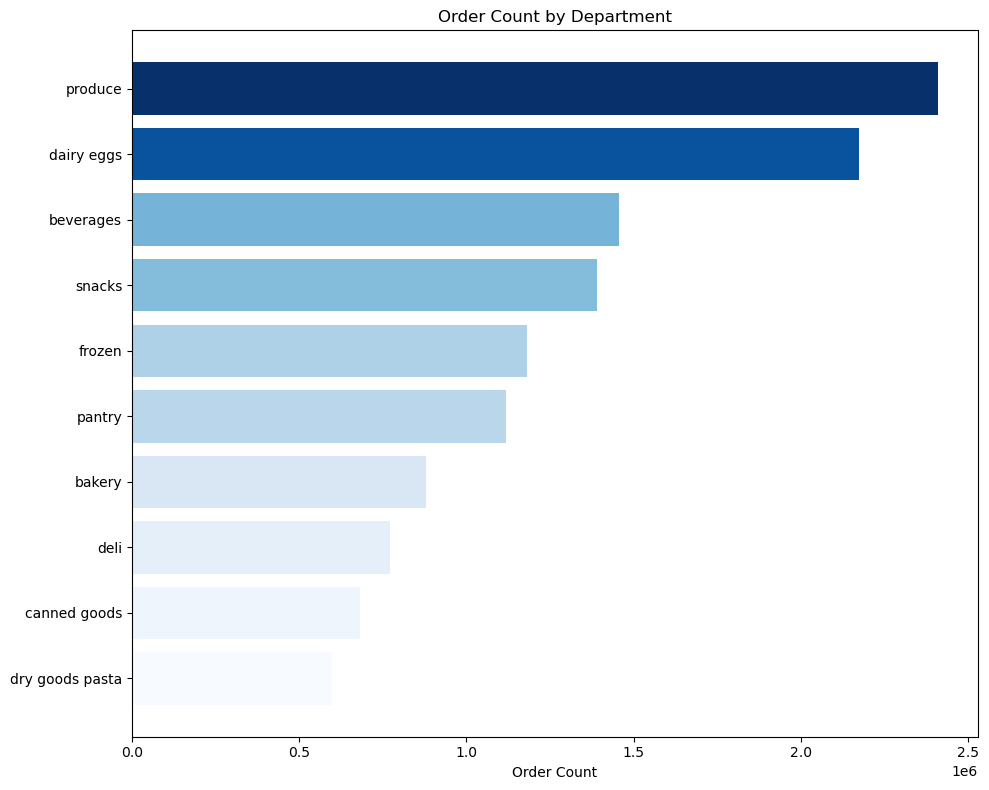

In [23]:
department_order_counts = pd.DataFrame({
    'department': ['produce', 'dairy eggs', 'beverages', 'snacks', 'frozen',
                   'pantry', 'bakery', 'deli', 'canned goods', 'dry goods pasta'],
    'order_count': [2409320, 2174815, 1456999, 1391447, 1180461,
                    1117763, 878658, 770300, 681305, 597862]
})

# Sorting the data to ensure the chart is ordered
department_order_counts_sorted = department_order_counts.sort_values('order_count', ascending=True)

# Define a single color, with shades based on order_count
norm = plt.Normalize(department_order_counts_sorted['order_count'].min(), department_order_counts_sorted['order_count'].max())
colors = [plt.cm.Blues(norm(value)) for value in department_order_counts_sorted['order_count']]

# Plot
plt.figure(figsize=(10, 8))
plt.barh(department_order_counts_sorted['department'], department_order_counts_sorted['order_count'], color=colors)
plt.xlabel('Order Count')
plt.title('Order Count by Department')
plt.tight_layout()

# Saving 
plt.savefig('/Users/user/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/popular_departments.png')
plt.show()

In [24]:
df.to_pickle('/Users/user/Documents/Instacart Basket Analysis/02 Data/Prepared Data/Final_part_2.pkl')

In [ ]:
# Adjusting the groupby operation to include the observed parameter
avg_price_by_segment = df.groupby('income_segment', observed=True)['mean_price'].mean().reset_index()


# Step 5: Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_segment, x='income_segment', y='mean_price')
plt.title('Average Product Price by Income Segment')
plt.xlabel('Income Segment')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(avg_price_by_segment)
